(linearregression)=
# Lineare Regression

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> lineare Regression einsetzen </li>
        <li> mit Annahmen und python-Werkzeugen </li>
        <li> um Daten zu analysieren und zu modellieren </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
#import datetime as dt
#import holidays
#import seaborn as sns
#import plotly
#import plotly.graph_objects as go
#import plotly.express as px
#import sys
#import os
import locale
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)
#print('datetime', dt)
#print('holidays', holidays.__version__)
#print('seaborn', sns.__version__)
#print('plotly', plotly.__version__)
#print('sys', sys.version)
#print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.21.5
matplotlib 3.5.2
pandas 1.4.4
scipy 1.7.3
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda-latest/envs/22sye/lib/python3.10/locale.py'>


### Grafikparameter einstellen

In [13]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Lineare Regression

Lineare Regression bedeutet, dass man annimmt, dass sich eine Datenreihe $y_i(x_i)$ mit einer Gerade modellieren lässt:

\begin{equation}
y = m\cdot x + b
\end{equation}

Die Gerade $y(x)$ hat die Steigung $m$ und den $y$-Achsen-Abschnitt $b$.

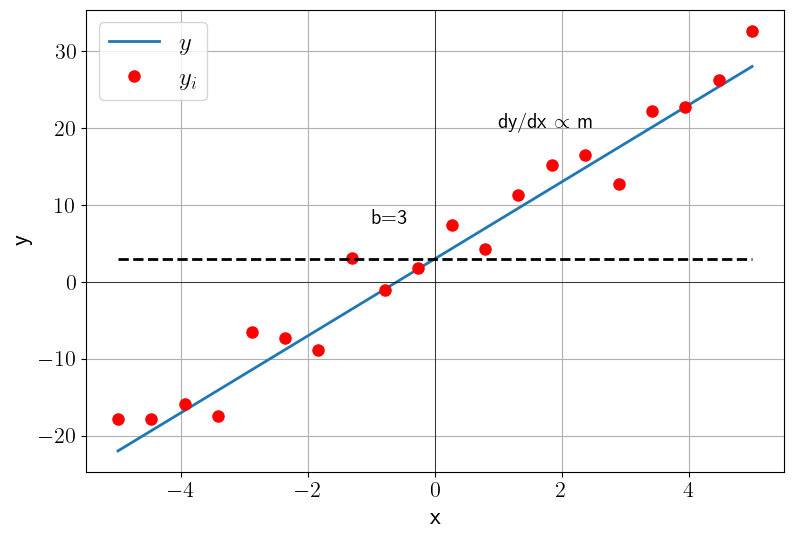

In [14]:
x = np.linspace(-5,5,1000)
m = 5
b = 3
y = m*x+b
xi = np.linspace(-5,5,20)
yi = m*xi+b+5*np.random.randn(len(xi))
plt.figure(figsize=(9,6))
plt.plot(x,y,label='$y$')
plt.plot(xi,yi,'ro',label='$y_i$')
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.text(-1,b*2.5,'b='+str(b), fontsize='15')
plt.plot([np.min(x),np.max(x)],[b,b],'k--')
plt.text(1,4*m,'dy/dx $\propto$ m', fontsize='15')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Wie man die Gerade findet

Wir gehen davon aus, dass $x_i$ und $y_i$ bekannt sind, z. B. aus Messungen oder anderen externen Quellen. Nun wollen wir die Gerade finden oder sehen, ob es eine gibt. Der Parameter $R^2$ gibt an, wie gut das Modell stimmt.

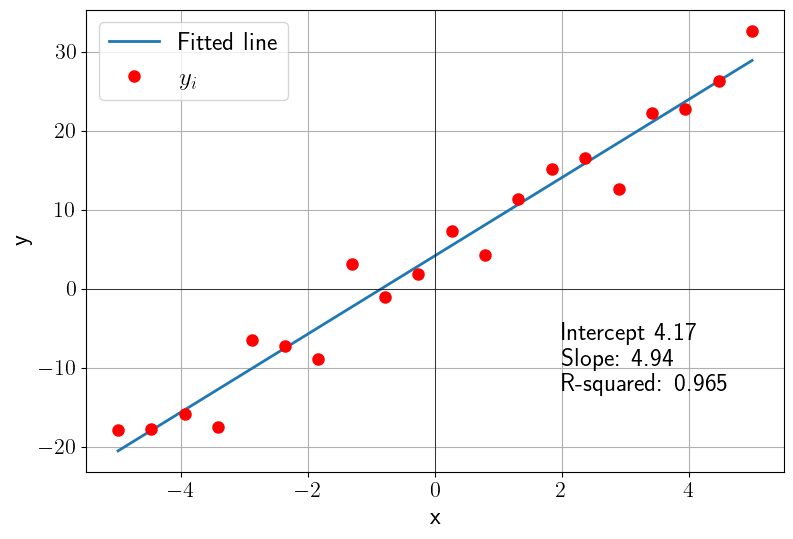

In [17]:
res = stats.linregress(xi, yi)

reg_text = 'Intercept {:.2f}\nSlope: {:.2f}\nR-squared: {:.3f}'.format(res.intercept,res.slope,res.rvalue**2)
plt.figure(figsize=(9,6))
plt.plot(xi, res.intercept + res.slope*xi,label='Fitted line')
plt.plot(xi,yi,'ro',label='$y_i$')
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.text(2,-13,reg_text)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Nutzung für die Modellierung von Energiedaten

Hier treffen wir die Annahme, dass eine Waschmaschine in der Lage ist, den Energieverbrauch zu reduzieren, wenn die Wäschemenge niedriger ist. Ob diese Annahme valide ist, sollte man auf jeden Fall nachmessen!

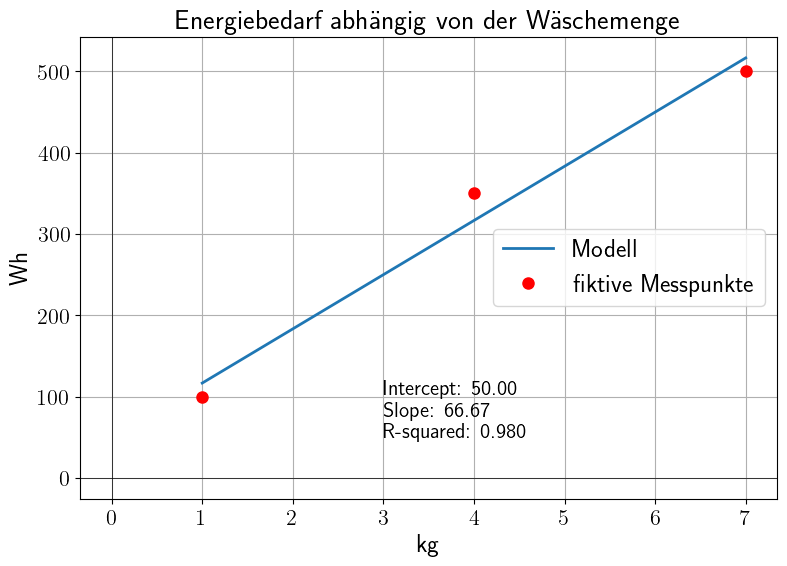

In [18]:
kg=[1,4,7]
wh=[100,350,500]
xi=pd.Series(kg)
yi=pd.Series(wh)

res = stats.linregress(xi, yi)

reg_text = 'Intercept: {:.2f}\nSlope: {:.2f}\nR-squared: {:.3f}'.format(res.intercept,res.slope,res.rvalue**2)
plt.figure(figsize=(9,6))
plt.plot(xi, res.intercept + res.slope*xi,label='Modell')
plt.plot(xi,yi,'ro',label='fiktive Messpunkte')
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.text(3,50,reg_text, fontsize='15')
plt.xlabel('kg')
plt.ylabel('Wh')
plt.title('Energiebedarf abhängig von der Wäschemenge')
plt.legend()
plt.grid()
plt.show()

```{bibliography}
:filter: docname in docnames
```